In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping



# Read Data

In [52]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Split Train and Test

In [53]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

X_test = data_test.drop(['Class'], axis=1)
y_test = data_test['Class']

# Count of each class

In [54]:
fraud = data_train[data_train['Class'] == 1].value_counts().sum()
not_fraud = data_train[data_train['Class'] == 0].value_counts().sum()

print ('Number of fraud cases: ', fraud)
print ('Number of non-fraud cases: ', not_fraud)
print ('Percentage of fraud cases: ', fraud/(fraud+not_fraud)*100)
print ('Percentage of non-fraud cases: ', not_fraud/(fraud+not_fraud)*100)

Number of fraud cases:  394
Number of non-fraud cases:  227451
Percentage of fraud cases:  0.17292457591783889
Percentage of non-fraud cases:  99.82707542408215


# Resampling

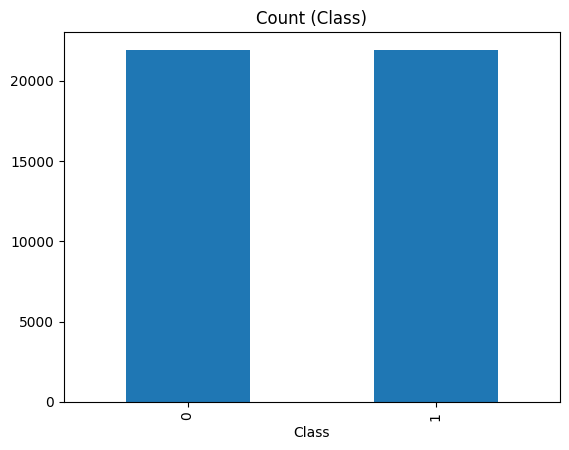

In [27]:
over = SMOTETomek(sampling_strategy=0.10)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('1', over), ('0', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(data_train.drop(['Class'], axis=1), data_train['Class'])
X_train = pd.DataFrame(X_train, columns=data_train.drop(['Class'], axis=1).columns)
y_train = pd.DataFrame(y_train, columns=['Class'])
data_train = pd.concat([X_train, y_train], axis=1)

data_train['Class'].value_counts().plot(kind='bar', title='Count (Class)')
plt.show()

# Standardization

In [28]:
data_train = data_train.reset_index(drop=True)
X_train = data_train.drop(['Class'], axis=1)
y_train = data_train['Class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM Grid Search

In [32]:
cls=SVC()
param = {
    'kernel': ['rbf', 'poly', 'linear'],
    'C': [ 0.1, 1, 10],
    'gamma': ['scale', 1, 10, 'auto'],
}
grid_search = GridSearchCV(estimator=cls, param_grid=param, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 1, 10, 'auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='f1', verbose=1)

In [35]:
result = pd.DataFrame(grid_search.cv_results_)
result = result[['rank_test_score', 'param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'std_test_score']]
result

,rank_test_score,param_C,param_gamma,param_kernel,mean_test_score,std_test_score
0,29,0.1,scale,rbf,0.977971,0.001820
1,31,0.1,scale,poly,0.976662,0.001902
2,25,0.1,scale,linear,0.978089,0.001725
3,34,0.1,1,rbf,0.942350,0.002280
4,1,0.1,1,poly,0.996430,0.000489
5,25,0.1,1,linear,0.978089,0.001725
6,36,0.1,10,rbf,0.281149,0.006869
7,6,0.1,10,poly,0.995773,0.000746
8,25,0.1,10,linear,0.978089,0.001725
9,29,0.1,auto,rbf,0.977971,0.001820


# OverSampling

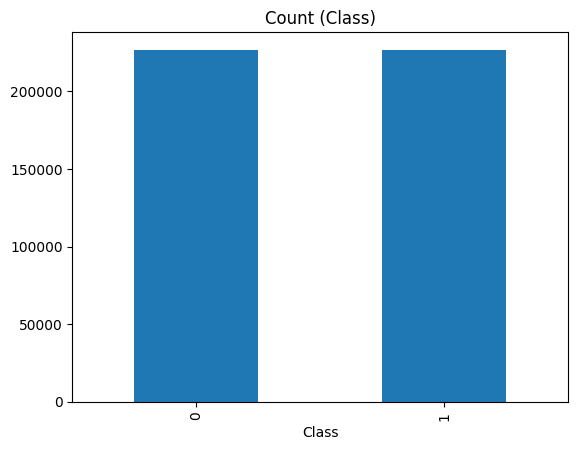

In [8]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

X_test = data_test.drop(['Class'], axis=1)
y_test = data_test['Class']

over = SMOTETomek(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('1', over), ('0', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(data_train.drop(['Class'], axis=1), data_train['Class'])
X_train = pd.DataFrame(X_train, columns=data_train.drop(['Class'], axis=1).columns)
y_train = pd.DataFrame(y_train, columns=['Class'])
data_train = pd.concat([X_train, y_train], axis=1)

data_train['Class'].value_counts().plot(kind='bar', title='Count (Class)')
plt.show()

In [9]:
data_train = data_train.reset_index(drop=True)
X_train = data_train.drop(['Class'], axis=1)
y_train = data_train['Class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM train and test

In [10]:
svm=SVC(kernel='poly', C=0.1, gamma=1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly', random_state=42)

In [50]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.80      0.64        98

    accuracy                           1.00     56962
   macro avg       0.77      0.90      0.82     56962
weighted avg       1.00      1.00      1.00     56962

[[56796    68]
 [   20    78]]
Accuracy:  0.9984551104244935
Precision:  0.5342465753424658
Recall:  0.7959183673469388
F1:  0.6393442622950819


# LogisticRegression train and test

In [12]:
Lr = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
Lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [51]:
y_pred = Lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.90      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

[[56398   466]
 [   10    88]]
Accuracy:  0.9916435518415786
Precision:  0.1588447653429603
Recall:  0.8979591836734694
F1:  0.2699386503067485


# Sequential Model train and test

In [55]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model1 = Sequential()
model1.add(Dense(32, activation='relu', input_shape=X_train[0].shape))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=[f1_m])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [58]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                992       
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history1 = model1.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/50
5670/5670 [==============================] - 15s 3ms/step - loss: 0.0058 - f1_m: 0.9987 - val_loss: 0.0018 - val_f1_m: 0.9998
Epoch 2/50
5670/5670 [==============================] - 14s 2ms/step - loss: 0.0041 - f1_m: 0.9988 - val_loss: 3.6765e-04 - val_f1_m: 1.0000
Epoch 3/50
5670/5670 [==============================] - 17s 3ms/step - loss: 0.0061 - f1_m: 0.9988 - val_loss: 0.0022 - val_f1_m: 0.9997
Epoch 4/50
5670/5670 [==============================] - 15s 3ms/step - loss: 0.0041 - f1_m: 0.9992 - val_loss: 7.2010e-04 - val_f1_m: 0.9999
Epoch 5/50
5670/5670 [==============================] - 13s 2ms/step - loss: 0.0029 - f1_m: 0.9992 - val_loss: 5.4315e-04 - val_f1_m: 1.0000
Epoch 6/50
5670/5670 [==============================] - 12s 2ms/step - loss: 0.0043 - f1_m: 0.9990 - val_loss: 4.5620e-04 - val_f1_m: 1.0000
Epoch 7/50
5670/5670 [==============================] - 13s 2ms/step - loss: 0.0040 - f1_m: 0.9991 - val_loss: 0.0015 - val_f1_m: 0.9998


In [22]:
y_pred1 = model1.predict(X_test)
y_pred1 = np.round(y_pred1)
y_pred1 = y_pred1.astype(int)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("Accuracy: ", accuracy_score(y_test, y_pred1))
print("Precision: ", precision_score(y_test, y_pred1))
print("Recall: ", recall_score(y_test, y_pred1))
print("F1: ", f1_score(y_test, y_pred1))

1781/1781 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.81      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56831    33]
 [   19    79]]
Accuracy:  0.9990871107053826
Precision:  0.7053571428571429
Recall:  0.8061224489795918
F1:  0.7523809523809524


# XGBoost train and test

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56845    19]
 [   16    82]]
Accuracy:  0.999385555282469
Precision:  0.8118811881188119
Recall:  0.8367346938775511
F1:  0.8241206030150754
